定义表名列名路径等

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
from pandas import DataFrame,Series
import os
    
u_info_header = ["user_id","gender","ocupation","education","marriage","residence"]
l_time_header = ["user_id","grant_time"]
bk_detail_header = ["user_id","tras_time","tras_type","tras_amount","income_sign"]
b_history_header = ["user_id","bh_time","browse_behavior","browse_num"]
bl_detail_header = ["user_id","bill_time","bank_id","last_bill_amount","last_repay_amount","credit_limit",
                    "bill_balance","lowest_repay_limit","consum_num","bill_amount","adjust_amount","cir_interest",
                    "avail_balance","avail_cash_limit","repay_state"]
overdue_header = ["user_id","is_overdue"]
basis_path = "C:\\Users\\CDA\\graduated_design\\data\\train_data\\"
u_info_path = os.path.join(basis_path,"user_info_train.txt")
l_time_path = os.path.join(basis_path,"loan_time_train.txt")
bk_detail_path = os.path.join(basis_path,"bank_detail_train.txt")
bl_detail_path = os.path.join(basis_path,"bill_detail_train.txt")
b_history_path = os.path.join(basis_path,"browse_history_train.txt")
overdue_path = os.path.join(basis_path,"overdue_train.txt")
#basis_path = os.getcwd()+os.sep+"CDA"+os.sep+"graduated_design"+os.sep+"personal_credit_forecast"+os.sep+"train_data"+os.sep

查看各个分类变量分布数量

2


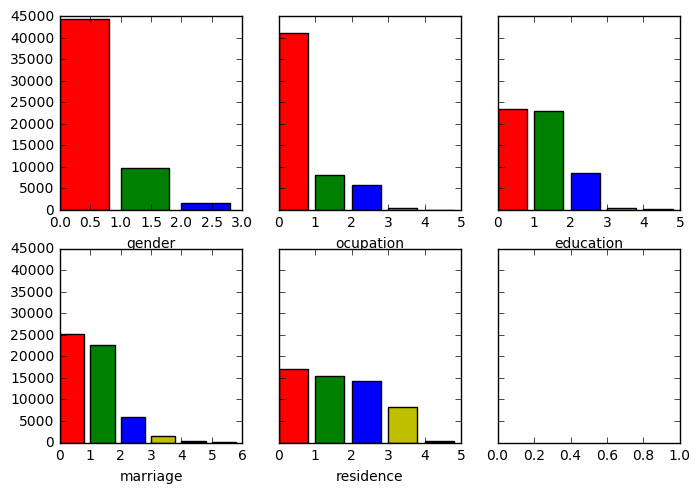

In [2]:
user_info_train = pd.read_table(u_info_path,sep = ",",header = None,names = u_info_header)
u_cat = u_info_header[1:]
def plot_bar(cat_col):
    r = int(np.ceil(len(cat_col)/3))
    print(r)
    c = 3
    fig, axes = plt.subplots(r,c,figsize = (8,5.5),sharey = True)
    col = 0        
    for i in range(r):
        for j in range(c):
            if col < len(cat_col):
                axes[i,j].bar(range(len(user_info_train[cat_col[col]].unique())),user_info_train[cat_col[col]].value_counts(),width = 0.8,color = "rgbyk")
                axes[i,j].set_xlabel(cat_col[col])  
                #axes[i,j].set_ylabel("total_count")
                #ax.hist(user_info_train["gender"],bins = 3,normed = False, histtype = "bar", facecolor = "r",bottom = 4)
                col = col + 1
            else:
                break
    plt.subplots_adjust()
    plt.show()
plot_bar(u_cat)
#print(user_info_train["gender"].unique())
#print(user_info_train["gender"].value_counts())

user_info_train表转换哑变量，分别是处理数量较少的分类和没处理数量少的分类

In [6]:

user_info_train_virtual = pd.get_dummies(user_info_train,columns = u_info_header[1:])
user_info_train_virtual.iloc[0:3,:]#检查各个分类数量多少再根据情况转化为哑变量
#(user_info_train["ocupation"] < 2).value_counts()
#user_info_train.isnull().any()
#user_info_train["gender"].unique()
user_info_train_virtual.to_csv(basis_path+"user_temp_table\\user_virtaul_train.csv",index = None,encoding = "utf8")
a = pd.read_csv(basis_path+"user_temp_table\\user_virtaul_train.csv")
a.iloc[:3,:]

user_id  gender_0  gender_1  gender_2  ocupation_0  ocupation_1  \
0     3150       0.0       1.0       0.0          0.0          0.0   
1     6965       0.0       1.0       0.0          0.0          0.0   
2     1265       0.0       1.0       0.0          0.0          0.0   

   ocupation_2  ocupation_3  ocupation_4  education_0     ...       \
0          1.0          0.0          0.0          0.0     ...        
1          1.0          0.0          0.0          0.0     ...        
2          0.0          1.0          0.0          0.0     ...        

   marriage_1  marriage_2  marriage_3  marriage_4  marriage_5  residence_0  \
0         1.0         0.0         0.0         0.0         0.0          0.0   
1         0.0         0.0         1.0         0.0         0.0          0.0   
2         0.0         0.0         1.0         0.0         0.0          0.0   

   residence_1  residence_2  residence_3  residence_4  
0          0.0          0.0          0.0          1.0  
1          0.0          1.0          0.0          0.0  
2          1.0          0.0          0.0          0.0  

[3 rows x 25 columns]

In [11]:
user_info_tra_temp = user_info_train
user_info_tra_temp.loc[user_info_tra_temp["gender"] == 0] = 2
user_info_tra_temp.loc[user_info_tra_temp["ocupation"] == 1] = 2
user_info_tra_temp.loc[user_info_tra_temp["ocupation"] == 0] = 3
user_info_tra_temp.loc[(user_info_tra_temp["education"] == 0) | (user_info_tra_temp["education"] == 1)] = 2
user_info_tra_temp.loc[(user_info_tra_temp["marriage"] == 0) | (user_info_tra_temp["marriage"] == 5)] = 4
user_info_tra_temp.loc[user_info_tra_temp["residence"] == 0] = 4
user_info_tra_temp.iloc[:2,:]
#for col in u_info_header[1:]:
#    print(user_info_tra_temp[col].value_counts())
user_infot_temp_vir = pd.get_dummies(user_info_tra_temp,columns = u_info_header[1:])
user_infot_temp_vir.to_csv(basis_path+"user_temp_table\\user_pro_virtaul_train.csv",index = None,encoding = "utf8")
b = pd.read_csv(basis_path+"user_temp_table\\user_pro_virtaul_train.csv")
b.iloc[:3,:]

user_id  gender_1  gender_2  gender_3  gender_4  ocupation_2  ocupation_3  \
0     3150       1.0       0.0       0.0       0.0          1.0          0.0   
1     6965       1.0       0.0       0.0       0.0          1.0          0.0   
2     1265       1.0       0.0       0.0       0.0          0.0          1.0   

   ocupation_4  education_2  education_3  education_4  marriage_1  marriage_2  \
0          0.0          0.0          0.0          1.0         1.0         0.0   
1          0.0          0.0          0.0          1.0         0.0         0.0   
2          0.0          0.0          0.0          1.0         0.0         0.0   

   marriage_3  marriage_4  residence_1  residence_2  residence_3  residence_4  
0         0.0         0.0          0.0          0.0          0.0          1.0  
1         1.0         0.0          0.0          1.0          0.0          0.0  
2         1.0         0.0          1.0          0.0          0.0          0.0

In [7]:
?pd.get_dummies